## Data BootCamp Final

### Exploratory Data Analysis

This dataset, from Kaggle, has information on US commuities, their demographics and crime rates.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import requests

In [272]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from linearmodels.iv import IV2SLS

In [ ]:
# pip install linearmodels

In [4]:
data = pd.read_csv("C:/Users/isabe/Downloads/crimedata.csv/crimedata.csv")

In [387]:
data

,communityName,state,countyCode,communityCode,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumKidsBornNeverMar,PctKidsBornNeverMar,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,OwnOccQrange,RentLowQ,RentMedian,RentHighQ,RentQrange,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39.0,5320.0,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,11980,100.00,75122,89.24,1.55,70.20,23.62,1.03,18.39,79584,29711,30233,13600,5725,27101,5115.0,22838,227,1.96,5.81,9.90,48.18,2.70,64.55,14.65,28.82,5.49,50.73,3.67,26.38,5.22,4.47,3.22,91.43,90.17,95.78,95.81,44.56,58.88,31,0.36,1277,8.69,13.00,20.99,30.93,0.93,1.39,2.24,3.30,85.68,1.37,4.81,4.17,2.99,3.00,2.84,91.46,0.39,11.06,3,64,98.37,91.01,3.12,37.50,1959,0.00,0.28,215900,262600,326900,111000,685,1001,1001,316,1001,23.8,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.5,1845.9,9.63,NaN,NaN,NaN,NaN,0.0,NaN,0,0.00,0.0,0.00,1.0,8.20,4.0,32.81,14.0,114.85,138.0,1132.08,16.0,131.26,2.0,16.41,41.02,1394.59
1,Marpletownship,PA,45.0,47616.0,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,23123,100.00,47917,78.99,1.11,64.11,35.50,2.75,22.85,55323,20148,20191,18137,0,20074,5250.0,12222,885,3.98,5.61,13.72,29.89,2.43,61.96,12.26,29.28,6.39,37.64,4.23,27.99,6.45,5.42,3.11,86.91,85.33,96.82,86.46,51.14,62.43,43,0.24,1920,5.21,8.65,13.33,22.50,0.43,0.72,1.11,1.87,87.79,1.81,4.25,3.34,2.70,2.83,1.96,89.03,1.01,23.60,3,240,97.15,84.88,0.00,18.33,1958,0.31,0.14,136300,164200,199900,63600,467,560,672,205,627,27.6,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.6,2186.7,3.84,NaN,NaN,NaN,NaN,0.0,NaN,0,0.00,1.0,4.25,5.0,21.26,24.0,102.05,57.0,242.37,376.0,1598.78,26.0,110.55,1.0,4.25,127.56,1955.95
2,Tigardcity,OR,NaN,NaN,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,29344,100.00,35669,82.00,1.15,55.73,22.25,2.94,14.56,42112,16946,17103,16644,21606,15528,5954.0,8405,1389,4.75,2.80,9.09,30.13,4.01,69.80,15.95,21.52,8.79,32.48,10.10,25.78,14.76,12.55,2.95,78.54,78.85,92.37,75.72,66.08,74.19,164,0.88,1468,16.42,23.98,32.08,35.63,0.82,1.20,1.61,1.78,93.11,1.14,2.97,2.05,2.42,2.69,2.06,64.18,2.03,47.46,3,544,95.68,57.79,0.92,7.54,1976,1.55,0.12,74700,90400,112

In [ ]:
data[data["PolicPerPop"].isnull()].groupby(by="state").sum().shape #viewing the null values 

(46, 145)

In [ ]:
print(list(data.columns)) #columns to decide what to include in my analysis 

['communityName', 'state', 'countyCode', 'communityCode', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumKidsBornNeverMar', 'PctKidsBornNeverMar', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImm

In general this dataset has data on population, household composition, race, age, urban, income, wage, poverty, education, family composition, divorce, job types, race per cap, immigrants, language spoken, ownership, house composition, rent prices, police presence and crime. 
I chose to evaluate the variables below 

In [ ]:
all = data[['population', 'PopDens', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', #demographics
'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', #age
'pctUrban', 'medIncome', 'pctWWage', #income 
'PctPopUnderPov', #poverty
'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', #education
'PctImmigRecent', 'PctImmigRec5', #immigration
'RentMedian', #rent
'NumInShelters', 'PctUsePubTrans', #shelters + transit
'PolicCars', #instrumental variable
'PolicPerPop', #variable of interest
'PolicBudgPerPop', 
'ViolentCrimesPerPop' #y variable 
]]

In [386]:
data["PolicPerPop"].isna().sum()

1872

In [ ]:
all_dropped = all.dropna() #dropping na values for now

In [78]:
X_dropped = all_dropped[['population', 'PopDens', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 
          'agePct16t24', 'agePct65up', 'pctUrban', 'medIncome', 'pctWWage', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 
          'PctUnemployed', 'PctEmploy','PctImmigRecent', 'PctImmigRec5', 'RentMedian', 'NumInShelters', 'PctUsePubTrans', 'PolicBudgPerPop',
          'PolicPerPop']]
y_dropped = all_dropped["ViolentCrimesPerPop"]

In [ ]:
print(all.isnull().sum()) #my x, y and iv have missing values

### Regression Analysis

#### Multiple Regression

In [371]:
F_values, p_values = f_regression(X_dropped, y_dropped)

df = pd.DataFrame({'Independent Variables': X_dropped.columns, 'p-values': p_values})
df #To help me decide how to limit my variables to the most significant

,Independent Variables,p-values
0,population,9.062957e-04
1,PopDens,5.822455e-03
2,householdsize,1.979647e-01
3,racepctblack,5.551474e-41
4,racePctWhite,4.924055e-45
5,racePctAsian,2.281880e-01
6,racePctHisp,4.038504e-02
7,agePct12t21,7.274040e-04
8,agePct12t29,1.074084e-02
9,agePct16t24,1.881844e-02


In [ ]:
X_drop_reg = all_dropped[['population', 'PopDens', 'racepctblack', 'racePctWhite', 'racePctHisp', 'agePct12t21', 'agePct12t29', 
          'agePct16t24', 'medIncome', 'pctWWage', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 
          'PctUnemployed', 'PctEmploy','PctImmigRecent', 'PctImmigRec5', 'RentMedian', 'NumInShelters', 'PctUsePubTrans',
          'PolicPerPop']] #limited

In [ ]:
X_drop_reg = all_dropped[['PopDens', 'racepctblack', 'racePctWhite', 'racePctHisp', 'agePct12t29', 
         'medIncome', 'PctPopUnderPov', 'PctLess9thGrade',
          'RentMedian', 'NumInShelters', 'PctUsePubTrans',
          'PolicPerPop']] #even further filtered for variables the give the highest r^2 in our OLS model

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_drop_reg, y_dropped, test_size = 0.2, random_state = 42)

In [397]:
X_train_reg_c = sm.add_constant(X_train_1)
X_test_reg_c = sm.add_constant(X_test_1) 

linreg = sm.OLS(y_train_1, X_train_reg_c) 
results = linreg.fit()

print(results.summary()) #used sm to view statistical significance

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.595
Model:                             OLS   Adj. R-squared:                  0.575
Method:                  Least Squares   F-statistic:                     29.66
Date:                 Mon, 16 Dec 2024   Prob (F-statistic):           5.45e-41
Time:                         12:52:44   Log-Likelihood:                -1954.6
No. Observations:                  255   AIC:                             3935.
Df Residuals:                      242   BIC:                             3981.
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2470.1547    71

Here Police Per Population surprisingly has a large p-value.

In [196]:
linreg_predict = results.predict(X_test_reg_c)
mean_squared_error(y_test_1, linreg_predict)

204041.27947844975

#### Non-Linear Regression With Polynomial Features

In [ ]:
poly = PolynomialFeatures(degree=2)  
X_poly_train = poly.fit_transform(X_train_1)  
X_poly_test = poly.transform(X_test_1)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train_1)

linreg_poly_predict = poly_model.predict(X_poly_test)

mean_squared_error(y_test_1, linreg_poly_predict)

419081.89290372236

#### K Neighbor Regression

In [201]:
knn = KNeighborsRegressor()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_1)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test_1)

In [207]:
param_grid = {'n_neighbors': [5, 10, 15, 20, 25, 30]}
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train_1)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [5, 10, 15, 20, 25, 30]},
             scoring='neg_mean_squared_error')

In [209]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)

mean_squared_error(y_test_1, y_pred)

212682.24640729686

#### Random Forest

In [389]:
forest = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]   
}

grid_search_forest = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search_forest.fit(X_train_1, y_train_1)

best_rf_model = grid_search_forest.best_estimator_

In [390]:
y_pred_forest = best_rf_model.predict(X_test_1)
mean_squared_error(y_test_1, y_pred_forest) #forest is our best model

161484.1457011706

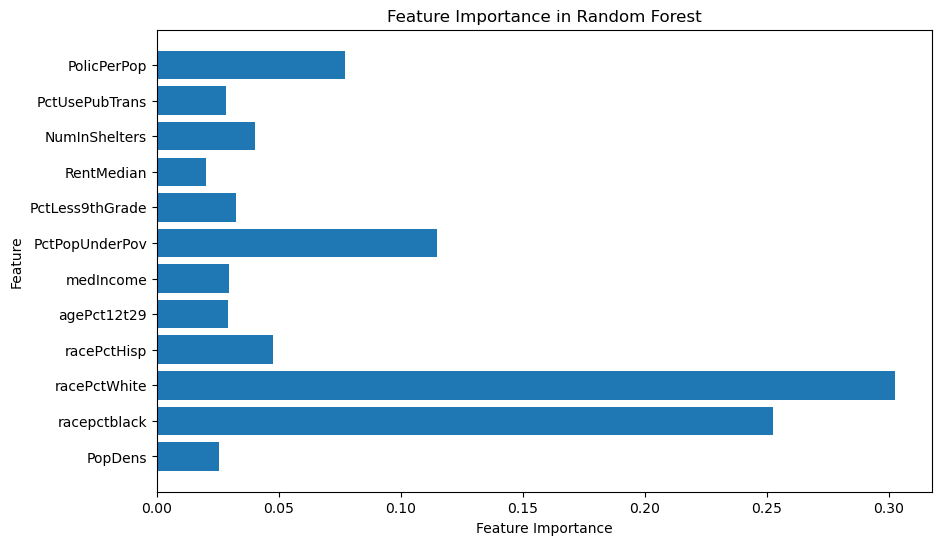

In [392]:
#interpretation
importances = best_rf_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(X_train_1.columns, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.show()

### Part 2: Instrumental Variables

Since Police per population is an endogenous variable, I believe we may be able to get a better estimate of the effect of police on crime by using the instrumental variable, police cars. Below I test for the relevance of police cars and then proceed to use it in a 2SLS model.

Step 1: Checking the Validity of the Instrumental Variable

In [215]:
X = data[['PopDens', 'racepctblack', 'racePctWhite', 'racePctHisp', 'agePct12t29', 
         'medIncome', 'PctPopUnderPov', 'PctLess9thGrade',
          'RentMedian', 'NumInShelters', 'PctUsePubTrans',
          'PolicPerPop']]

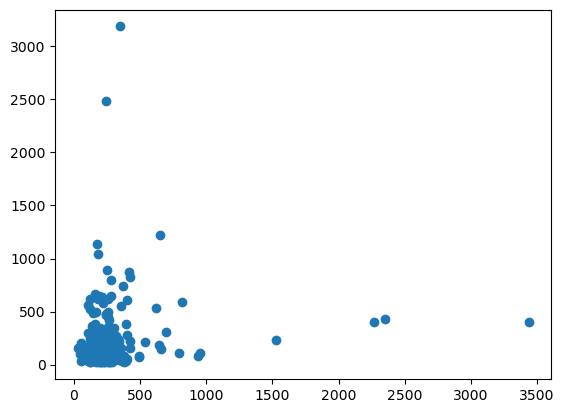

In [243]:
plt.scatter(all_dropped['PolicPerPop'], all_dropped['PolicCars'])

In [374]:
relevance = sm.OLS(all_dropped['PolicPerPop'], all_dropped['PolicCars']) 
relevance_test = relevance.fit()

print(relevance_test.summary()) #police cars is relevant as an instrumental variable. we can proceed to step 2

                                 OLS Regression Results                                
Dep. Variable:            PolicPerPop   R-squared (uncentered):                   0.197
Model:                            OLS   Adj. R-squared (uncentered):              0.194
Method:                 Least Squares   F-statistic:                              77.83
Date:                Sun, 15 Dec 2024   Prob (F-statistic):                    7.59e-17
Time:                        22:46:11   Log-Likelihood:                         -2309.0
No. Observations:                 319   AIC:                                      4620.
Df Residuals:                     318   BIC:                                      4624.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Step 2: Police Cars has many missing variables. So, I will run two 2SLS models, one with the dataset by deleting all the NA values and the other with a full dataset made by imputing the missing values. 

In [ ]:
impute_with_y = data[['population', 'PopDens', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', #demographics
'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up','pctUrban', 'medIncome', 'pctWWage', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 
'PctImmigRecent', 'PctImmigRec5', 'RentMedian', 'NumInShelters', 'PctUsePubTrans', 'PolicCars',  'ViolentCrimesPerPop']]
#using as much data to impute police cars

impute_with_y = impute_with_y.dropna(subset = ['ViolentCrimesPerPop'])
y = impute_with_y["ViolentCrimesPerPop"]
impute = impute_with_y.iloc[:,:-1]

In [ ]:
imputer = IterativeImputer(max_iter=10, random_state=42)
data_imputed = imputer.fit_transform(impute)

# add imputed values in the dataset 
full_data = pd.DataFrame(data_imputed, columns = impute.columns, index = impute.index)

In [363]:
full_data['PolicCars'] = full_data['PolicCars'].clip(lower=0) #removing negative values

In [ ]:
full_data #has my imputed values

,population,PopDens,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,pctUrban,medIncome,pctWWage,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctImmigRecent,PctImmigRec5,RentMedian,NumInShelters,PctUsePubTrans,PolicCars
0,11980.0,1845.9,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,100.00,75122.0,89.24,1.96,5.81,9.90,48.18,2.70,64.55,8.69,13.00,1001.0,11.0,9.63,0.000000
1,23123.0,2186.7,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,100.00,47917.0,78.99,3.98,5.61,13.72,29.89,2.43,61.96,5.21,8.65,560.0,0.0,3.84,32.379262
2,29344.0,2780.9,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,100.00,35669.0,82.00,4.75,2.80,9.09,30.13,4.01,69.80,16.42,23.98,428.0,16.0,4.37,73.583932
3,16656.0,3217.7,2.40,1.70,97.35,0.50,0.70,12.55,25.20,12.19,17.57,0.00,20580.0,68.15,17.23,11.05,33.68,10.81,9.86,54.74,13.86,13.86,250.0,0.0,3.31,113.648055
5,140494.0,1995.7,2.45,2.51,95.65,0.90,0.95,18.09,32.89,20.04,13.26,100.00,21577.0,75.78,17.78,8.76,23.03,20.66,5.72,59.02,21.33,30.56,280.0,327.0,0.97,179.370062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,56216.0,3365.4,3.07,6.87,61.68,15.23,29.86,15.46,30.16,14.34,8.08,100.00,24727.0,75.05,25.06,17.12,30.87,15.79,9.99,55.53,22.97,35.12,374.0,64.0,0.59,123.064350
2211,12251.0,1682.8,2.68,21.18,76.65,1.52,1.29,17.36,31.23,16.97,12.57,100.00,20321.0,75.06,20.79,12.51,27.71,19.28,7.90,54.64,2.91,45.09,248.0,0.0,1.15,116.609356
2212,32824.0,1195.2,2.46,0.52,92.62,0.98,11.00,11.81,20.96,9.53,20.73,100.00,27182.0,59.79,7.56,7.82,26.14,12.42,5.18,50.54,6.63,9.03,451.0,44.0,0.12,107.644914
2213,13547.0,2142.2,2.89,3.37,69.91,0.90,62.11,17.16,30.01,14.73,10.42,0.00,19899.0,71.67,30.32,24.37,39.63,12.40,12.12,52.53,4.85,8.09,227.0,0.0,0.00,117.371591


Step 3: Use 2SLS for both choices and compare

In [ ]:
X_tsls = all_dropped[['PopDens', 'racepctblack', 'racePctHisp', 
         'medIncome', 'PctPopUnderPov', 'PctLess9thGrade',
          'RentMedian', 'NumInShelters', 
          "PolicCars", "PolicPerPop"
          ]] #the variables from before except limited to maximize R^2 adj

In [330]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_tsls, all_dropped['ViolentCrimesPerPop'], test_size = 0.2, random_state = 42)

In [ ]:
tsls = IV2SLS(dependent=y_train_2, exog = sm.add_constant(X_train_2.iloc[:, :-2]) , endog= X_train_2["PolicPerPop"], 
              instruments=X_train_2[["PolicCars"]])

tsls_results = tsls.fit()

print(tsls_results) #2SLS with deleted na-values

                           IV-2SLS Estimation Summary                          
Dep. Variable:     ViolentCrimesPerPop   R-squared:                      0.2882
Estimator:                     IV-2SLS   Adj. R-squared:                 0.2620
No. Observations:                  255   F-statistic:                    253.50
Date:                 Mon, Dec 16 2024   P-value (F-stat)                0.0000
Time:                         17:58:33   Distribution:                  chi2(9)
Cov. Estimator:                 robust                                         
                                                                               
                                Parameter Estimates                                
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
const               347.16     405.99     0.8551     0.3925     -448.58      1142.9
PopDens            -0.01

Now I will run my 2SLS model with the imputed values. Because I need to estimate more values of PolicPerPop then I have, I have to manually regress on each stage. 

In [ ]:
to_make_predictions = full_data[['PopDens', 'racepctblack', 'racePctHisp', 
         'medIncome', 'PctPopUnderPov', 'PctLess9thGrade',
          'RentMedian', 'NumInShelters', 
          "PolicCars"]] #dataset with exogenous and instrumental variables

In [ ]:
stage_one = sm.OLS(X_train_2['PolicPerPop'], sm.add_constant(X_train_2.iloc[:,:-1])).fit(cov_type='HC3')  
# Regress endogenous variable on instruments for stage one

In [ ]:
X_hat = stage_one.predict(sm.add_constant(to_make_predictions)) #PolicPerPop predictions for all of my observations

In [416]:
X_stage2 = sm.add_constant(pd.concat([X_hat, to_make_predictions.iloc[:, :-1]], axis=1))  
#use y as defined before 

stage_two = sm.OLS(y, X_stage2).fit(cov_type='HC3')

print(stage_two.summary())

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.546
Model:                             OLS   Adj. R-squared:                  0.544
Method:                  Least Squares   F-statistic:                     121.3
Date:                 Mon, 16 Dec 2024   Prob (F-statistic):          1.03e-181
Time:                         14:11:18   Log-Likelihood:                -14845.
No. Observations:                 1994   AIC:                         2.971e+04
Df Residuals:                     1984   BIC:                         2.977e+04
Df Model:                            9                                         
Covariance Type:                   HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -293.4943    39

#### Relevance to NYC 

To relate our analysis to NYC, I collected the crime reports specifically from transit for the year of 2024 from the NYPD. Below are the values given. 

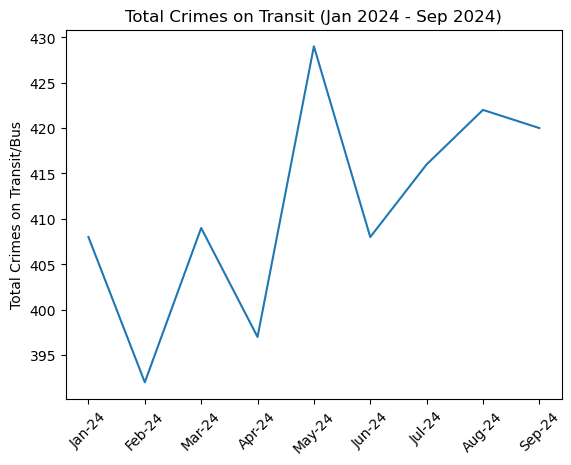

In [ ]:
crime_nyc = {'Date': ['Jan-24', 'Feb-24', 'Mar-24', 'Apr-24', 'May-24', 'Jun-24', 'Jul-24', 'Aug-24', 'Sep-24'],
    'Total Crimes': [408, 392, 409, 397, 429, 408, 416, 422, 420]}
crime_nyc = pd.DataFrame(crime_nyc)

plt.plot(crime_nyc['Date'], crime_nyc['Total Crimes'])
plt.title('Total Crimes on Transit (Jan 2024 - Sep 2024)')
plt.ylabel('Total Crimes on Transit/Bus')
plt.xticks(rotation=45)
plt.show()